In [189]:
using Plots
using FFTW

In [190]:
# reverse a signal about the first element
flip(x) = x[-(0:length(x)-1) .& (length(x)-1) .+ 1]

flip (generic function with 1 method)

# FFT Identities

## Linearity

Addition and scalar multiplication work as expected.

`fft(x) + fft(y) = fft(x + y)`

`k*fft(x) = fft(k*x)`

## Reversing Time and Frequency

Reversing time reverses frequency.

`flip(fft(x)) = fft(flip(x))`

### Conjugating has a similar effect

Conjugate in time is equal to the conjugate of the reverse in freq.

`fft(conj(x)) = conj(flip(fft(x))) = conj(fft(flip(x)))`

Conjugate in freq is equal to the conjugate of the reverse in time.

`conj(fft(x)) = flip(fft(conj(x)))) = fft(flip(conj(x))))`

<!-- Swapping re/im acts similar to conjugation. (Note: I feel like there was a better identity to use here...)

`conj(fft(x)*im) = flip(conj(fft((x)))*im)` -->

## Almost it's own inverse

Same as FFT, but flipped and scaled.

`ifft(x) = flip(fft(x))/N = fft(flip(x))/N`

Since flipping and conjugation are related, you can use that too.

`ifft(x) = conj(fft(conj(x)))/N`

Also you can swap re/im before and after.

`ifft(x) = conj(fft(conj(x)*im))*im/N`

## Zero padding

Padding out a signal with zeros doesn't add any addtional information. It will increase the frequency resolution of the fft without adding any addition frequencies to it.

## Repetition and Sequences

`fft(x) = [a, b, c, d]`

`fft([x; x;]) = 2*[a, 0, b, 0, c, 0, d, 0]`

In [332]:
N = 8
x, y = rand(0:9, N) + rand(0:9, N)im, rand(0:9, N) + rand(0:9, N)im
X, Y = fft(xa), fft(xb)
0

0

In [ ]:
f() = fft(x)
g() = fft(x)
round.(f() - g(); digits = 10)

plot(
    plot([real(f()), real(g())]),
    plot([imag(f()), imag(g())]),
    plot([abs.(f()), abs.(g())]),
    label = ["f" "g"]
)

In [ ]:
phase = cispi.(0.0*(1:2N))

plot()
plot!(abs.(fft([x; x;])/2))
plot!(abs.(fft([x; reverse(x);].*phase)/2))
# plot!(range(0, 1 + 3/4N, 4N), abs.(fft([x; x; x; x;])/4))


In [339]:
z = zeros(ComplexF64, 2N)
z[2:2:2N] .= real(x)
Z = fft(z)

plot(
    plot(real(Z)),
    plot(imag(Z)),
    plot(abs.(Z)),
    label = ["f" "g"]
)
round.(Z; digits=3)

Z[0N + 1:1N] + Z[1N + 1:2N]
# [x; -x] sequence?

8-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [191]:
N = 8
# x = Array(1:N)
# x = Array(1:N).^2
x = rand(-9:9, N) + rand(-9:9, N)*im
# x = cos.((0:N-1).*(6π/N))
# plot(x)

y = fft(x)
# plot([x, abs.(y)])
round.([x y]; digits=2)


8×2 Matrix{ComplexF64}:
 -6.0+8.0im   -14.0+7.0im
  4.0-7.0im   -9.05-8.02im
 -4.0-8.0im    -1.0+12.0im
 -2.0+6.0im   -3.44+33.09im
 -4.0-1.0im   -32.0-1.0im
  0.0+7.0im  -18.95+16.02im
 -9.0+4.0im     7.0+10.0im
  7.0-2.0im   23.44-5.09im

# Calculating a complex valued FFT

In [4]:
# calculate FFT of odd elements
xo = Array(x)
xo[2:2:N] .= 0
yo = fft(xo)

# calculate FFT of even elements
xe = Array(x)
xe[1:2:N] .= 0
ye = fft(xe)

# FFT is linear, you can add the results
round.([yo ye yo + ye]; digits=2)

8×3 Matrix{ComplexF64}:
   1.0-1.0im   -11.0+0.0im     -10.0-1.0im
   5.0-25.0im   3.54-2.12im     8.54-27.12im
   9.0+3.0im     8.0-7.0im      17.0-4.0im
 -19.0-1.0im    2.12-24.75im  -16.88-25.75im
   1.0-1.0im    11.0+0.0im      12.0-1.0im
   5.0-25.0im  -3.54+2.12im     1.46-22.88im
   9.0+3.0im    -8.0+7.0im       1.0+10.0im
 -19.0-1.0im   -2.12+24.75im  -21.12+23.75im

The FFT of a sequence with even elements 0s is the FFT of the odd elements repeated twice.

The FFT of a sequence with odd elements 0s is the FFT of the evens phase shifted by half a sample and repeated twice with the second repetition negated.

In [5]:
# fft of evens and odds without zeros inserted
phase = cispi.(-(0:N÷2-1)./(N÷2))
yo = fft(x[1:2:N])
ye = fft(x[2:2:N]).*phase

# add them to get the full fft
round.([yo ye yo + ye; yo -ye yo - ye;]; digits=2)

8×3 Matrix{ComplexF64}:
   1.0-1.0im   -11.0+0.0im     -10.0-1.0im
   5.0-25.0im   3.54-2.12im     8.54-27.12im
   9.0+3.0im     8.0-7.0im      17.0-4.0im
 -19.0-1.0im    2.12-24.75im  -16.88-25.75im
   1.0-1.0im    11.0-0.0im      12.0-1.0im
   5.0-25.0im  -3.54+2.12im     1.46-22.88im
   9.0+3.0im    -8.0+7.0im       1.0+10.0im
 -19.0-1.0im   -2.12+24.75im  -21.12+23.75im

# Real and Imaginary Valued FFTs

In [6]:
# calculate FFT of just real values
yre = fft(real(x))
yim = fft(imag(x)im)

# FFT is linear, you can add the results
round.([yre yim yre + yim]; digits=2)

8×3 Matrix{ComplexF64}:
 -10.0+0.0im       0.0-1.0im     -10.0-1.0im
 -6.29-25.44im   14.83-1.69im     8.54-27.12im
   9.0-7.0im       8.0+3.0im      17.0-4.0im
 -7.71-1.44im    -9.17-24.31im  -16.88-25.75im
  12.0+0.0im       0.0-1.0im      12.0-1.0im
 -7.71+1.44im     9.17-24.31im    1.46-22.88im
   9.0+7.0im      -8.0+3.0im       1.0+10.0im
 -6.29+25.44im  -14.83-1.69im   -21.12+23.75im

In [7]:
# works the other way too if you have the FFT
y2 =  conj(flip(y))
yre = (y + y2)/2
yim = (y - y2)/2
round.([yre yim]; digits=2)

8×2 Matrix{ComplexF64}:
 -10.0+0.0im       0.0-1.0im
 -6.29-25.44im   14.83-1.69im
   9.0-7.0im       8.0+3.0im
 -7.71-1.44im    -9.17-24.31im
  12.0+0.0im       0.0-1.0im
 -7.71+1.44im     9.17-24.31im
   9.0+7.0im      -8.0+3.0im
 -6.29+25.44im  -14.83-1.69im

# Real Valued FFTs

In [8]:
x = real(x)
xo = x[1:2:N]
xe = x[2:2:N]
round.([x fft(x)]; digits=2)

8×2 Matrix{ComplexF64}:
 -1.0+0.0im  -10.0+0.0im
  4.0+0.0im  -6.29-25.44im
  4.0+0.0im    9.0-7.0im
  0.0+0.0im  -7.71-1.44im
  6.0+0.0im   12.0+0.0im
 -6.0+0.0im  -7.71+1.44im
 -8.0+0.0im    9.0+7.0im
 -9.0+0.0im  -6.29+25.44im

In [9]:
x2 = x[1:2:N] + x[2:2:N]im
y = fft(x2)
y2 = conj(flip(y))
yo = (y + y2)/2
ye = (y - y2)/2 * -im.*phase

round.(yo + ye; digits=2)

4-element Vector{ComplexF64}:
 -10.0 + 0.0im
 -6.29 - 25.44im
   9.0 - 7.0im
 -7.71 - 1.44im

# Calculating DCTs via the FFT

## DCT-II

In [10]:
dct2(x) = real(fft([x; reverse(x)])[1:N].*cispi.(-(0:N - 1)/2N))
dct2(x)

8-element Vector{Float64}:
 -20.0
  44.41815597791128
 -31.094878769821538
  -4.327516743375737
   2.82842712474619
 -20.72555190867187
  -8.550351705637727
  18.18657517067727

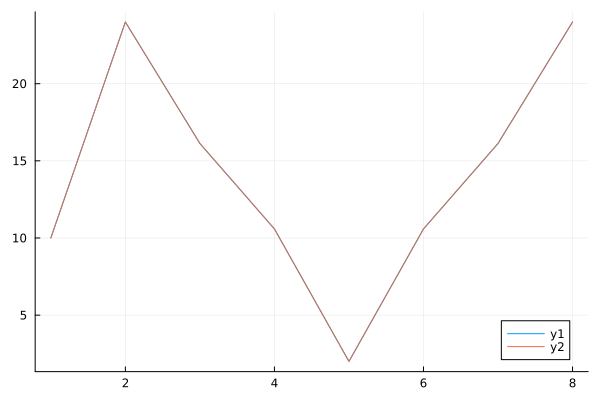

In [14]:
x2 = [x; reverse(x)]
xo = x2[1:2:2N]
yo = fft(xo)
phase = cispi.(-(0:N-1)./(N))
ye = fft(flip(xo)) #.*phase
# ye = conj(yo).*phase
round.((yo + ye).*cispi.(-(0:N-1)/2N); digits=2)

plot(abs.([yo ye]))

In [12]:
# DCT-III
dct3(x) = real(fft([x; 0; -reverse(x); -x[2:N]; 0; reverse(x[2:N])])[2:2:2N])/2
dct3(dct2(x))/2N - x

8-element Vector{Float64}:
 8.881784197001252e-16
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [13]:
# DCT - IV
dct4(x) = real(fft([x; -reverse(x); -x; reverse(x)])[2:2:2N].*cispi.((1:2:2N-1)/-4N))

norm4 = sqrt(2)/N
dct4(dct4(x))*norm4^2 - 2x

8-element Vector{Float64}:
 -8.881784197001252e-16
  1.7763568394002505e-15
  1.7763568394002505e-15
 -3.4328560143969665e-16
  7.105427357601002e-15
 -5.329070518200751e-15
 -3.552713678800501e-15
 -3.552713678800501e-15